In [218]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [219]:
df = pd.read_csv('C:/Users/ednae/Documents/Repositórios/e-waste/data/processed/dados_den_tratados.csv',index_col=[0])

In [220]:
df.rename(columns={'The strategies towards a circular economy will be evaluated under a set of criteria/indicators, which are considered qualitative because they cover multiple dimensions and subjectivity (environmental, social, and economic). For this purpose, we elaborated on the Likert-type scales, ranging from 1 (2est level) to 5 (4est level).  Please evaluate each strategy giving your evaluation under this scale (1-5). The fol2ing sections of the questionnaire will ask you about your "perception" of how much this strategy contributes to the transition towards a circular economy, in macro-level. Then,  you should indicate your opinion based on the scale like the one presented be2. ':'explanation'},inplace=True)

In [221]:
df.reset_index(drop=True,inplace=True)

In [252]:
df.columns[-8:]

Index(['Local', 'Do you act directly with the circular economy?',
       'Self knowledge about circular economy',
       'What is your segment of acting?',
       'What sector does your organization operate in?', 'company_size',
       'How do you describe your position in your organization?',
       'Do you like to leave any comment?'],
      dtype='object')

## Roteiro - Por variável de descrição
- Realização de ajustes necessários
- Traçar o perfil dos entrevistados
- Lista de colunas:
    - Local
    - Do you act directly with the circular economy?
    - What is your segment of acting?
    - What sector does your organization operate in?
    - company_size
    - How do you describe your position in your organization?
    - Do you like to leave any comment?
## Responder as questões:
    - Existe diferença de conhecimento acerca da EC entre pessoas pertencentes a distintas áreas de atuação? 
    - Quem tende a conhecer mais acerca do assunto?
    - Quem tende a conhecer menos sobre o assunto?
    - Que estratégias são priorizadas pela dinamarca?

### `Coluna: Descrição dos trabalhos`

In [222]:
df.iloc[:,-2].value_counts()

Advisor (Senior advisor, advisor)                                                                       22
Staff (operational jobs)                                                                                22
Executive or Strategic Manager  (Senior executive, executive)                                           15
Managers(Senior manager, manager)                                                                       14
Middle Management (Senior director, director)                                                           10
Advisor (Senior advisor, advisor), Staff (operational jobs)                                              5
i'm still under education                                                                                1
Advisor (Senior advisor, advisor), Did Circular Economy & Eco-design it-research in Berlin 2014-2018     1
Sustainability Assistant                                                                                 1
Project Manager.                     

<Axes: >

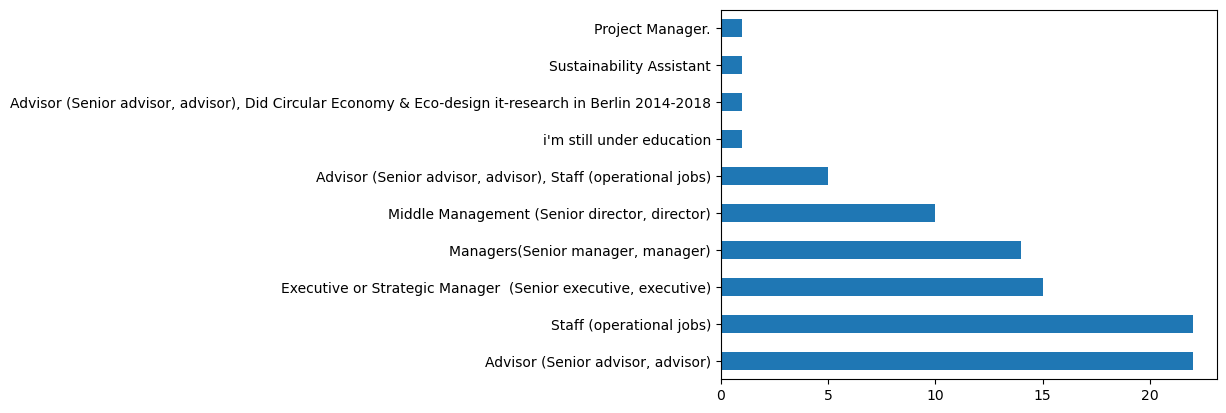

In [223]:
df.iloc[:,-2].value_counts()[0:10].plot(kind='barh')

### `Coluna: Área de atuação`

In [224]:
df['Do you act directly with the circular economy?'].value_counts()

1                                                                                    81
0                                                                                    19
I am not sure what that means.                                                        1
Sustainability/Engineering                                                            1
Partly - not 100% focused                                                             1
Starting  Sustainable Start-up                                                        1
Indirectly by providing waste recycling equipment                                     1
I have a degree in circular economy, but currently don´t work directly with that      1
Indirectly through other sustainability efforts                                       1
Partly through work in production                                                     1
Name: Do you act directly with the circular economy?, dtype: int64

In [225]:
df.loc[0,'Do you act directly with the circular economy?']

'1'

`Respostas não diferentes de 1, serão tidas como 0`

In [226]:
def adjust_relation(x):
    if x=='1':
        x=1
    elif x!=1 or x!='1':
        x=0
    return(x)

In [227]:
df['Do you act directly with the circular economy?'] = df['Do you act directly with the circular economy?'].apply(adjust_relation)

In [228]:
df['Do you act directly with the circular economy?'].value_counts()

1    81
0    27
Name: Do you act directly with the circular economy?, dtype: int64

### `Coluna: Tamanho da organização que participa`

In [229]:
df.iloc[:,-3]

0         Grande
1          Média
2         Grande
3         Grande
4      Acadêmico
         ...    
103       Grande
104        Micro
105       Grande
106        Micro
107        Micro
Name: company_size, Length: 108, dtype: object

In [230]:
df.iloc[:,-3].value_counts()

Grande         55
Micro          17
Pequena        15
Média          12
Individual      4
Sem empresa     3
Acadêmico       2
Name: company_size, dtype: int64

### `Coluna: Setor de atuação`

In [231]:
df.iloc[:,-4].value_counts()

Quaternary Sector (involves intellectual activities, such as information generation and sharing)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           26
Quinary Sector (involves non-profit services such as health, education, culture, research (unpaid), police, firefighters, civil guard and non-governmental organizations).                                                                                                                                                                                                                                                

In [232]:
[len(i) for i in df.iloc[:,-4].value_counts().index]

[96,
 170,
 93,
 74,
 268,
 267,
 169,
 191,
 172,
 418,
 516,
 439,
 75,
 363,
 177,
 265,
 12,
 10,
 25,
 10,
 34,
 22,
 583,
 311]

`Alguns respondentes selecionaram diversos setores. Medida de correção:`

- Para aqueles que selecionaram dois setores, o primeiro será considerado o principal
- Para aqueles que selecionaram >2 setores, serão postos numa nova categoria 'Sem setor'

In [233]:
def ajuste_setor(x):
    x=str(x)
    if (len(x)<=268):
        if ',' in x:
            posicao_virgula = x.find(',')
            x = x[:posicao_virgula]
        elif x=='University' or x=="i'm still under education":
            x='Reasearch and aducation'
    else:
        x = 'sem setor'
    return(x)
    

In [234]:
df.iloc[:,-4].apply(ajuste_setor).value_counts()

Quaternary Sector (involves intellectual activities                                              31
Secondary Sector (involves the transformation of raw materials into goods)                       21
Quinary Sector (involves non-profit services such as health                                      19
Tertiary sector (involves trade and the provision of services to consumers and /or companies)    15
sem setor                                                                                         9
nan                                                                                               5
Reasearch and aducation                                                                           2
Primary Sector (involves the extraction and/or production of raw materials)                       2
Research and education                                                                            1
municipality                                                                                      1


### `Coluna: Seguimento de atuação`

In [235]:
df.iloc[:,-5].value_counts()

Academia/Research Institution                                                                                                                                                                                                                                                                                                                                                                                                                                                             25
Consultancy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                9
Engineering                                   

Existe a ocorrência de múltiplos setores de atuação nos entrevistados. Consederaremos que o primeiro setor de atuação citado pelo respondente, corresponde ao seu setor principal de atuação

In [236]:
df.iloc[:,-5] = [i[:i.find(',')] if type(i)==str else i for i in df.iloc[:,-5]]
df.iloc[:,-5].value_counts()

Academia/Research Institutio                 25
Academia/Research Institution                21
Consultancy                                  11
Consultanc                                    9
Waste processing and management               6
Engineerin                                    5
Non-governmental organization (NGO            4
Textile                                       4
Waste processing and managemen                2
Government                                    2
Engineering                                   2
Non-governmental organization (NGO)           2
Furnitur                                      2
Recyclin                                      1
Packaging                                     1
Construction                                  1
Water processing and managemen                1
Persona                                       1
Constructio                                   1
Product development                           1
Packagin                                

In [242]:
df.iloc[:,-5]= df.iloc[:,-5].replace({'Consultanc':'Consultancy','Persona':'Personal','Packagin':'Packaging',
                                     'Productio':'Production','Water processing and managemen':'Water processing and management',
                                     'Non-governmental organization (NGO':'Non-governmental organization (NGO)',
                                     'Constructio':'Construction','Engineerin':'Engineering','Furnitur':'Furniture',
                                     'Recyclin':'Recycling','Waste processing and managemen':'Waste processing and management',
                                     'Academia/Research Institutio':'Academia/Research Institution'})

In [243]:
df.iloc[:,-5].value_counts()

Academia/Research Institution                46
Consultancy                                  20
Waste processing and management               8
Engineering                                   7
Non-governmental organization (NGO)           6
Textile                                       4
Furniture                                     2
Construction                                  2
Packaging                                     2
Water processing and management               2
Government                                    2
Recycling                                     1
Personal                                      1
Product development                           1
Energy and heat processing and management     1
Production                                    1
Name: What is your segment of acting?, dtype: int64

A pergunta agora poderia ser: qual seu setor **primário/principal** de atuação

### As demais colunas de descrição não necessitam de ajustes, pois foram préviamente organizadas

In [254]:
df.to_csv('dados_den_final.csv')